In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from operators import getGrad
from readWrite import *
from geosVelFromSSH import writeWithGeosVel


filename = 'flt_HIGH_PASS.pop.h.0009-01-05.nc'
gridFileName = 'flt_HIGH_PASS.pop.h.0009-01-05.nc'
fieldFileNameList = 'flt_HIGH_PASS.pop.h.0009-01-05.nc'

dataset = Dataset(filename)

OMEGA = np.array(dataset.variables['omega'])
g = np.array(dataset.variables['grav'])
rho = np.array(dataset.variables['rho_sw'])


dimensions, U_Grid_Var, T_Grid_Var = readGridInfo(gridFileName)
Zlen = dimensions[0]
Ylen = dimensions[1]
Xlen = dimensions[2]

var = U_Grid_Var.loc[U_Grid_Var['name'] == 'DXU']['val']
heading = var.keys()[0]
DX = var[heading]

var = U_Grid_Var.loc[U_Grid_Var['name'] == 'DYU']['val']
heading = var.keys()[0]
DY = var[heading]

var = U_Grid_Var.loc[U_Grid_Var['name'] == 'ULAT']['val']
heading = var.keys()[0]
phi = var[heading]

var = T_Grid_Var.loc[T_Grid_Var['name'] == 'KMT']['val']
heading = var.keys()[0]
KMT = var[heading]

fieldsDF, timeDict = readField(fieldFileNameList, ['SSH','RHO','SALT','TAUX','TAUY','time'])

var = fieldsDF.loc[fieldsDF['name'] == 'SSH']['val']
heading = var.keys()[0]
SSH = var[heading]
SSH = SSH[0,:,:]

landMask = np.ma.getmask(np.ma.masked_where(KMT < 1, KMT))
eqMask = np.ma.getmask(np.ma.masked_where(abs(phi) <= 3, phi))
nanMask = np.ma.getmask(np.ma.masked_where(abs(SSH) > 1e10, SSH))


mask3D = []

for k in range(Zlen):
    msk = np.ones((Ylen,Xlen), dtype = bool)
    msk = np.ma.array(msk, mask = (KMT < (k+1)), fill_value = False).filled()
    mask3D.append(msk)

mask = landMask + eqMask + nanMask

SSH = np.ma.array(SSH,mask = mask,fill_value=float('nan')).filled()


In [2]:
mask3D = np.array(mask3D)
type(mask3D)

numpy.ndarray

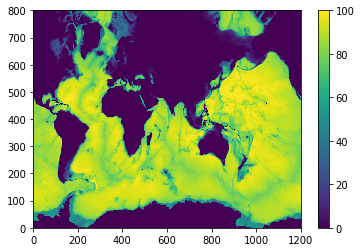

In [3]:
plt.pcolormesh(KMT)
plt.colorbar()

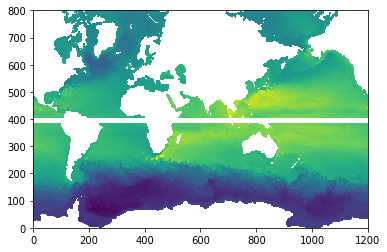

In [4]:
%matplotlib inline
plt.pcolormesh(SSH[:,:])
plt.show()

In [5]:
#writeWithGeosVel('flt_HIGH_PASS.pop.h.0009-01-05.nc')

In [6]:
dataset.variables.keys()

odict_keys(['time_bound', 'time', 'z_t', 'z_t_150m', 'z_w', 'z_w_top', 'z_w_bot', 'dz', 'dzw', 'ULONG', 'ULAT', 'TLONG', 'TLAT', 'KMT', 'KMU', 'REGION_MASK', 'UAREA', 'TAREA', 'HU', 'HT', 'DXU', 'DYU', 'DXT', 'DYT', 'HTN', 'HTE', 'HUS', 'HUW', 'ANGLE', 'ANGLET', 'days_in_norm_year', 'grav', 'omega', 'radius', 'cp_sw', 'sound', 'vonkar', 'cp_air', 'rho_air', 'rho_sw', 'rho_fw', 'stefan_boltzmann', 'latent_heat_vapor', 'latent_heat_fusion', 'ocn_ref_salinity', 'sea_ice_salinity', 'T0_Kelvin', 'salt_to_ppt', 'ppt_to_salt', 'mass_to_Sv', 'heat_to_PW', 'salt_to_Svppt', 'salt_to_mmday', 'momentum_factor', 'hflux_factor', 'fwflux_factor', 'salinity_factor', 'sflux_factor', 'nsurface_t', 'nsurface_u', 'UVEL', 'VVEL', 'KE', 'TEMP', 'SALT', 'RHO', 'SSH', 'SSH2', 'SHF', 'SHF_QSW', 'SFWF', 'TAUX', 'TAUY', 'EVAP_F', 'PREC_F', 'SNOW_F', 'MELT_F', 'ROFF_F', 'SALT_F', 'SENH_F', 'LWUP_F', 'LWDN_F', 'MELTH_F', 'IAGE', 'WVEL', 'UET', 'VNT', 'PD', 'HMXL', 'XMXL', 'TMXL', 'HBLT', 'XBLT', 'TBLT'])

In [24]:
dataset.variables

OrderedDict([('time_bound', <class 'netCDF4._netCDF4.Variable'>
              float64 time_bound(time, d2)
                  long_name: boundaries for time-averaging interval
                  units: days since 0000-01-01 00:00:00
              unlimited dimensions: time
              current shape = (1, 2)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: time
                  units: days since 0000-01-01 00:00:00
                  bounds: time_bound
                  calendar: noleap
              unlimited dimensions: time
              current shape = (1,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('z_t', <class 'netCDF4._netCDF4.Variable'>
              float32 z_t(z_t)
                  long_name: depth from surface to midpoint of layer
                  units: centimeters
              

In [8]:
SHF = np.array(dataset.variables['SHF'])
SHF_title = dataset.variables['SHF'].long_name + ' in ' + dataset.variables['SHF'].units
SHF = SHF[0,:,:]
SHF = np.ma.array(SHF, mask = landMask, fill_value=float('nan')).filled()

SHF_QSW  = np.array(dataset.variables['SHF_QSW'])
SHF_QSW_title = dataset.variables['SHF_QSW'].long_name + ' in ' + dataset.variables['SHF_QSW'].units
SHF_QSW = SHF_QSW[0,:,:]
SHF_QSW = np.ma.array(SHF_QSW, mask = landMask, fill_value=float('nan')).filled()

SFWF  = np.array(dataset.variables['SFWF'])
SFWF_title = dataset.variables['SFWF'].long_name + ' in ' + dataset.variables['SFWF'].units
SFWF = SFWF[0,:,:]
SFWF = np.ma.array(SFWF, mask = landMask, fill_value=float('nan')).filled()

EVAP_F = np.array(dataset.variables['EVAP_F'])
EVAP_F_title = dataset.variables['EVAP_F'].long_name + ' in ' + dataset.variables['EVAP_F'].units
EVAP_F = EVAP_F[0,:,:]
EVAP_F = np.ma.array(EVAP_F, mask = landMask, fill_value=float('nan')).filled()

PREC_F = np.array(dataset.variables['PREC_F'])
PREC_F_title = dataset.variables['PREC_F'].long_name + ' in ' + dataset.variables['PREC_F'].units
PREC_F = PREC_F [0,:,:]
PREC_F = np.ma.array(PREC_F, mask = landMask, fill_value=float('nan')).filled()

SNOW_F = np.array(dataset.variables['SNOW_F'])
SNOW_F_title = dataset.variables['SNOW_F'].long_name + ' in ' + dataset.variables['SNOW_F'].units
SNOW_F = SNOW_F[0,:,:]
SNOW_F = np.ma.array(SNOW_F, mask = landMask, fill_value=float('nan')).filled()

SALT_F = np.array(dataset.variables['SALT_F'])
SALT_F_title = dataset.variables['SALT_F'].long_name + ' in ' + dataset.variables['SALT_F'].units
SALT_F = SALT_F[0,:,:]
SALT_F = np.ma.array(SALT_F, mask = landMask, fill_value=float('nan')).filled()

ROFF_F = np.array(dataset.variables['ROFF_F'])
ROFF_F_title = dataset.variables['ROFF_F'].long_name + ' in ' + dataset.variables['ROFF_F'].units
ROFF_F = ROFF_F[0,:,:]
ROFF_F = np.ma.array(ROFF_Frho, mask = landMask, fill_value=float('nan')).filled()

MELT_F = np.array(dataset.variables['MELT_F'])
MELT_F_title = dataset.variables['MELT_F'].long_name + ' in ' + dataset.variables['MELT_F'].units
MELT_F = MELT_F[0,:,:]
MELT_F = np.ma.array(MELT_F, mask = landMask, fill_value=float('nan')).filled()

SENH_F = np.array(dataset.variables['SENH_F'])
SENH_F_title = dataset.variables['SENH_F'].long_name + ' in ' + dataset.variables['SENH_F'].units
SENH_F = SENH_F[0,:,:]
SENH_F = np.ma.array(SENH_F, mask = landMask, fill_value=float('nan')).filled()


LWUP_F = np.array(dataset.variables['LWUP_F'])
LWUP_F_title = dataset.variables['LWUP_F'].long_name + ' in ' + dataset.variables['LWUP_F'].units
LWUP_F = LWUP_F[0,:,:]
LWUP_F = np.ma.array(LWUP_F, mask = landMask, fill_value=float('nan')).filled()

LWDN_F = np.array(dataset.variables['LWDN_F'])
LWDN_F_title = dataset.variables['LWDN_F'].long_name + ' in ' + dataset.variables['LWDN_F'].units
LWDN_F = LWDN_F[0,:,:]
LWDN_F = np.ma.array(LWDN_F, mask = landMask, fill_value=float('nan')).filled()


MELTH_F = np.array(dataset.variables['MELTH_F'])
MELTH_F_title = dataset.variables['MELTH_F'].long_name + ' in ' + dataset.variables['MELTH_F'].units
MELTH_F = MELTH_F[0,:,:]
MELTH_F = np.ma.array(MELTH_F, mask = landMask, fill_value=float('nan')).filled()

PD = np.array(dataset.variables['PD'])
PD_title = dataset.variables['PD'].long_name + ' in ' + dataset.variables['PD'].units
PD = PD[0,0,:,:]
PD = np.ma.array(PD, mask = landMask, fill_value=float('nan')).filled()

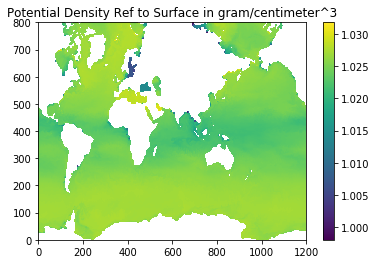

In [9]:
plt.pcolormesh(PD)
#plt.clim(0,500)
plt.title(PD_title)
plt.colorbar()

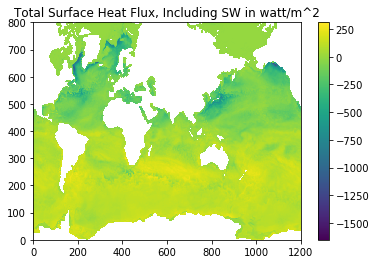

In [10]:
plt.pcolormesh(SHF)
#plt.clim(0,500)
plt.title(SHF_title)
plt.colorbar()

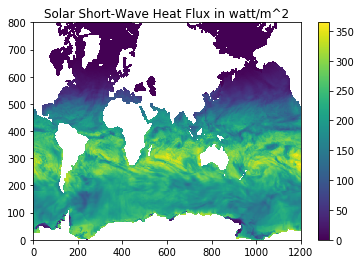

In [11]:
plt.pcolormesh(SHF_QSW)
#plt.clim(0,500)
plt.title(SHF_QSW_title)
plt.colorbar()

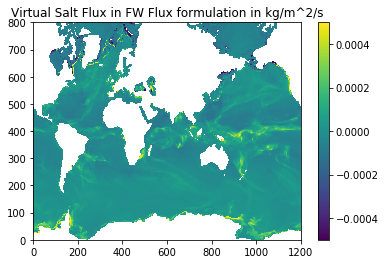

In [12]:
plt.pcolormesh(SFWF)
plt.clim(-0.0005,0.0005)
plt.title(SFWF_title)
plt.colorbar()

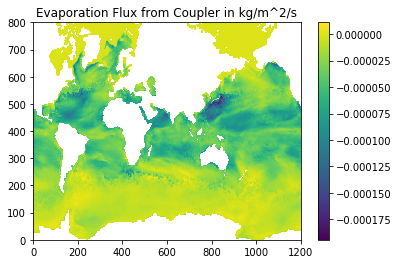

In [13]:
plt.pcolormesh(EVAP_F)
#plt.clim(-0.0005,0.0005)
plt.title(EVAP_F_title)
plt.colorbar()

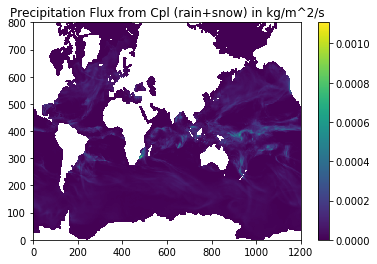

In [14]:
plt.pcolormesh(PREC_F)
#plt.clim(-0.0005,0.0005)
plt.title(PREC_F_title)
plt.colorbar()

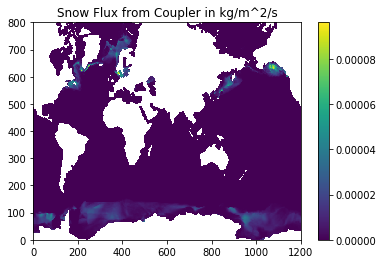

In [15]:
plt.pcolormesh(SNOW_F)
#plt.clim(-0.0005,0.0005)
plt.title(SNOW_F_title)
plt.colorbar()

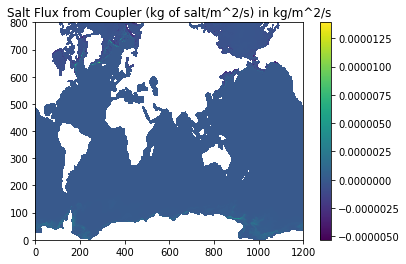

In [16]:
plt.pcolormesh(SALT_F )
#plt.clim(-0.0005,0.0005)
plt.title(SALT_F_title)
plt.colorbar()

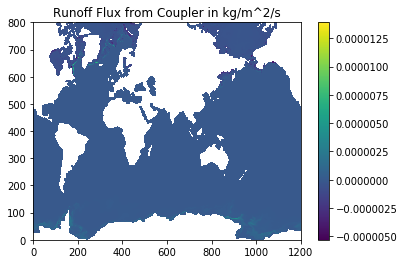

In [17]:
plt.pcolormesh(ROFF_F)
#plt.clim(-0.0005,0.0005)
plt.title(ROFF_F_title)
plt.colorbar()

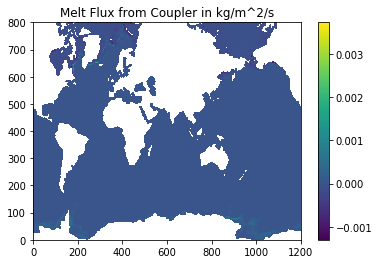

In [18]:
plt.pcolormesh(MELT_F)
#plt.clim(-0.0005,0.0005)
plt.title(MELT_F_title)
plt.colorbar()

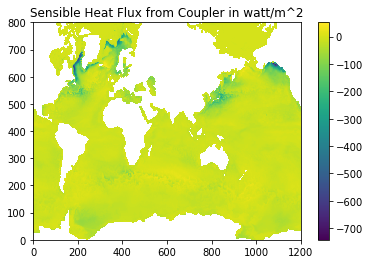

In [19]:
plt.pcolormesh(SENH_F)
#plt.clim(-0.0005,0.0005)
plt.title(SENH_F_title)
plt.colorbar()

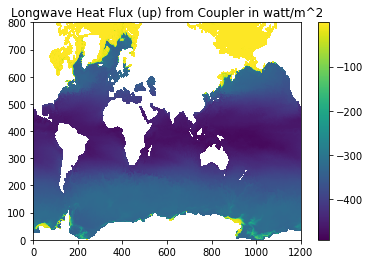

In [20]:
plt.pcolormesh(LWUP_F)
#plt.clim(-0.0005,0.0005)
plt.title(LWUP_F_title)
plt.colorbar()

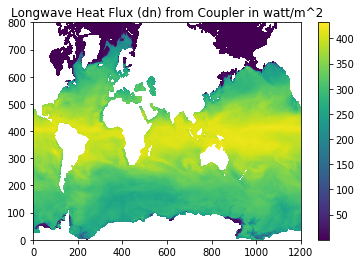

In [21]:
plt.pcolormesh(LWDN_F)
#plt.clim(-0.0005,0.0005)
plt.title(LWDN_F_title)
plt.colorbar()

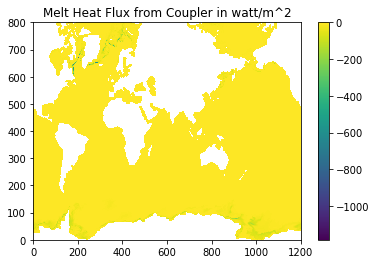

In [22]:
plt.pcolormesh(MELTH_F )
#plt.clim(-0.0005,0.0005)
plt.title(MELTH_F_title)
plt.colorbar()

In [30]:
var = fieldsDF.loc[fieldsDF['name'] == 'SALT']['val']
heading = var.keys()[0]
SALT = var[heading]
SALT = SALT[0,99,:,:]

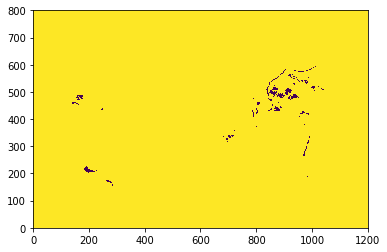

In [31]:
plt.pcolormesh(SALT)